In [1]:
!pip install jupyterlab-urdf
!pip install ikpy ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.8/232.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/bhtxy0525/lbr_iiwa7_r800-urdf-package

Cloning into 'lbr_iiwa7_r800-urdf-package'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 42 (delta 5), reused 29 (delta 0), pack-reused 0
Receiving objects: 100% (42/42), 2.04 MiB | 10.04 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [3]:
import ikpy.chain
import ikpy.utils.plot as plot_utils

import numpy as np
import time
import math

import ipywidgets as widgets

In [4]:
model = "/content/lbr_iiwa7_r800-urdf-package/urdf/lbr_iiwa7_r800.urdf"

my_chain = ikpy.chain.Chain.from_urdf_file(model,active_links_mask=[False, True, True, True, True, True, True, True])

In [5]:
q = [0, 0, 0, 0, 0, 0, 0, 0]

FK = my_chain.forward_kinematics(q)
FK[:3, 3]

array([0.00000000e+00, 3.39624544e-06, 1.26210000e+00])

In [11]:
def IK_calc(target_position = [0.2,0.2, 0.2]):

    #target_orientation = [-1, 0, 0]
    #ik = my_chain.inverse_kinematics(target_position, target_orientation, orientation_mode="Y")

    ik = my_chain.inverse_kinematics(target_position)
    print("The angles of each joints are : ", list(map(lambda r:math.degrees(r),ik.tolist())))

    computed_position = my_chain.forward_kinematics(ik)
    print("Computed position: %s, original position : %s" % (computed_position[:3, 3], target_position))
    print("Computed position (readable) : %s" % [ '%.2f' % elem for elem in computed_position[:3, 3] ])

    return ik

target_position = [0.2,0.2, 0.2]
ik = IK_calc(target_position)

The angles of each joints are :  [0.0, -42.9424962671324, 57.91034223427214, -2.66347370021038, -113.11745484601317, 1.176600028837228, 119.71624448911535, 0.0]
Computed position: [0.20000011 0.20000012 0.19999991], original position : [0.2, 0.2, 0.2]
Computed position (readable) : ['0.20', '0.20', '0.20']


In [14]:
from google.colab import output
output.enable_custom_widget_manager()

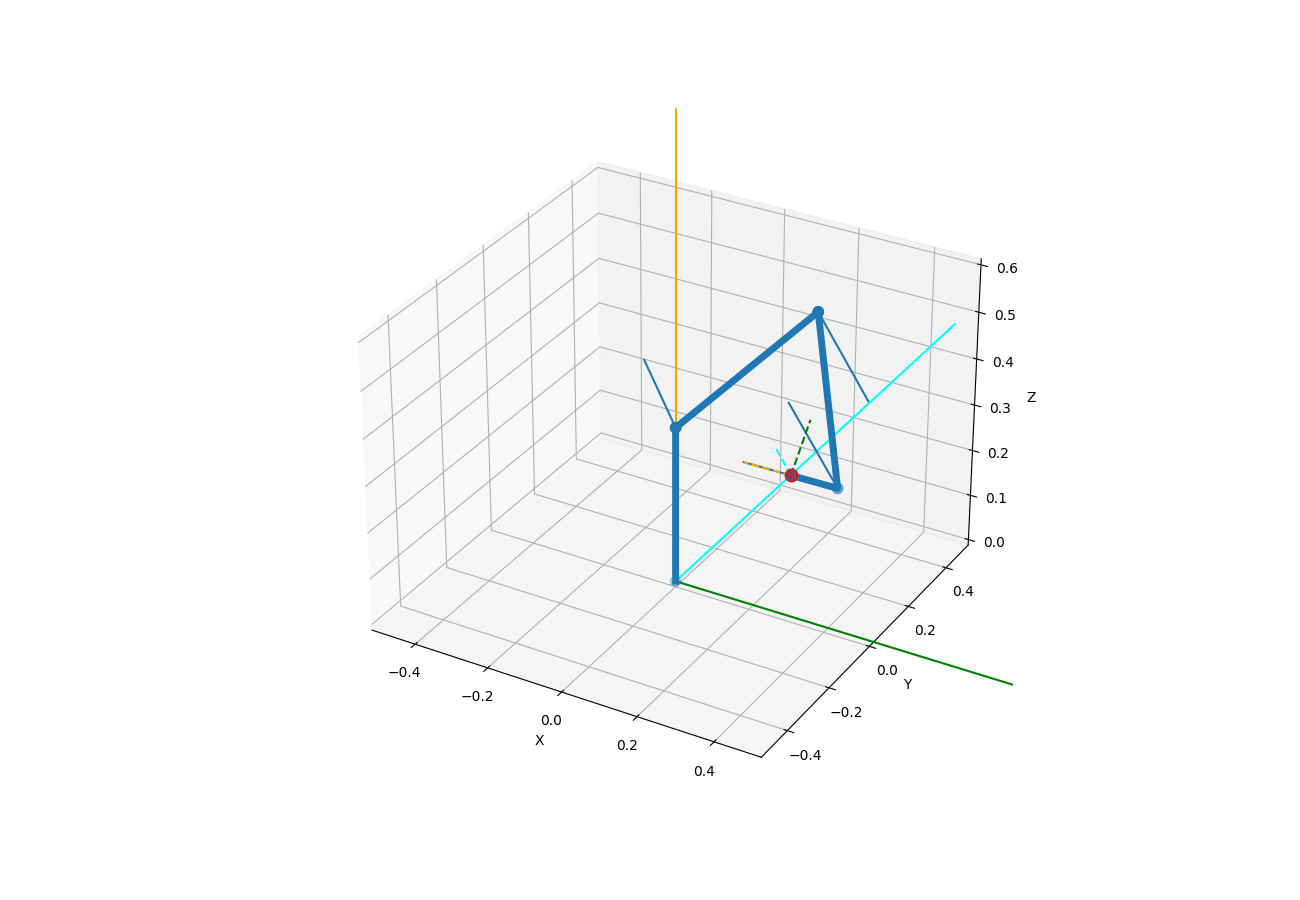

In [15]:
%matplotlib widget
#%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
fig.set_figheight(9)
fig.set_figwidth(13)
my_chain.plot(ik, ax, target=target_position)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0, 0.6)
plt.ion()